# Hola Rodrigo! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Rodrigo, tu notebook va muy bien. En general está correcto y bien logrado, pero debes modificar la data que utilizas como relevante y solo utilizar esta para los análisis de la segunda mitad, además de agregar un gráfico de rentabilidad promedio.
    
Saludos!    

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho Rodrigo, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

-----

# Proyecto Módulo 1
Por Rodrigo Ochoa

# Introducción

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Inicialización

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as m

In [52]:
df_games = pd.read_csv("/datasets/games.csv")

## Preparación

In [53]:
df_games.info()
df_games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien al mostrar la data

</div>

In [54]:
df_games.columns = df_games.columns.str.lower()

In [55]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

df_games['user_score'] = df_games['user_score'].replace(["tbd", "TBD"], np.nan).astype(float)

df_games['critic_score'] = df_games['critic_score'].astype(float)


<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

No estoy seguro qué se quiso hacer con critic_score. Primero se llenaron los nulos con 0, pero luego los cero se reemplazaron con nulos. Podrías dejar una explicación o corregirlo.

</div>

In [56]:
df_games.dropna(subset=['name', 'genre'], inplace=True)

median_critic_scores = df_games.groupby('genre')['critic_score'].median()
median_user_scores = df_games.groupby('genre')['user_score'].median()

for genre, median_value in median_critic_scores.items():
    df_games.loc[(df_games['genre'] == genre) & (df_games['critic_score'].isna()), 'critic_score'] = median_value

for genre, median_value in median_user_scores.items():
    df_games.loc[(df_games['genre'] == genre) & (df_games['user_score'].isna()), 'user_score'] = median_value

mode_ratings = df_games.groupby('genre')['rating'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

for genre, mode_value in mode_ratings.items():
    df_games.loc[(df_games['genre'] == genre) & (df_games['rating'].isna()), 'rating'] = mode_value


**Comentarios**

* Se eliminaron las filas sin "name" o "genre", ya que sin esta información el juego no puede identificarse ni clasificarse correctamente. 

* "Year_of_Release" se dejó en blanco porque no hay una manera de inferirlo sin datos adicionales. 

* Para "user_score", se reemplazó "TBD" por NaN y se llenaron los valores faltantes con la mediana del género, evitando sesgos extremos. 

* "Critic_score" también se rellenó con la mediana del género, asegurando valores más representativos sin influencias de valores atípicos. 

* En el caso de "rating", se usó la moda del género, ya que los juegos de la misma categoría suelen compartir clasificaciones de edad similares. Este método de imputación equilibra precisión y realismo, evitando la introducción de datos artificiales incorrectos. 

* Se optó por eliminar datos mínimos y completar los valores ausentes con métricas del propio dataset, garantizando consistencia. Así, los datos se mantienen fieles a su naturaleza sin distorsionar tendencias.

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

 - Ok con eliminar las filas con nulos de name o genre, son solo 2
 - year_of_release me haría sentido llenarla con la mediana o moda de los años de lanzamiento de los otros juegos de la plataforma
 - El user_score no me parece mal llenarlo por la mediana de cada género, pero no se ha realizado una evaluación de la variabilidad en esta variable por género, por lo que no sabemos realmente cómo impactará, aún es posible que introduzca sesgos
 - Para critic score tengo el mismo comentario que para user_score
 - Para el rating, me parece ok

En general, no estoy muy de acuerdo con las imputaciones, aunque se tiene la idea correcta. No hay problema con ellas en este notebook, las puedes mantener.    
    
</div>

In [57]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correcto.
    
</div>

In [58]:
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,E,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,73.0,7.4,M,28.31


## Análisis

In [59]:
# Juegos lanzados por año
games_per_year = df_games['year_of_release'].value_counts().sort_index()
print(games_per_year)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


* Se observa un aumento en la cantidad de juegos lanzados a partir de los años 90, alcanzando su punto máximo entre 2005 y 2010.

* Después de 2010, la cantidad de lanzamientos ha disminuido, lo que podría deberse a cambios en la industria como el auge de los juegos digitales y la consolidación de franquicias establecidas.

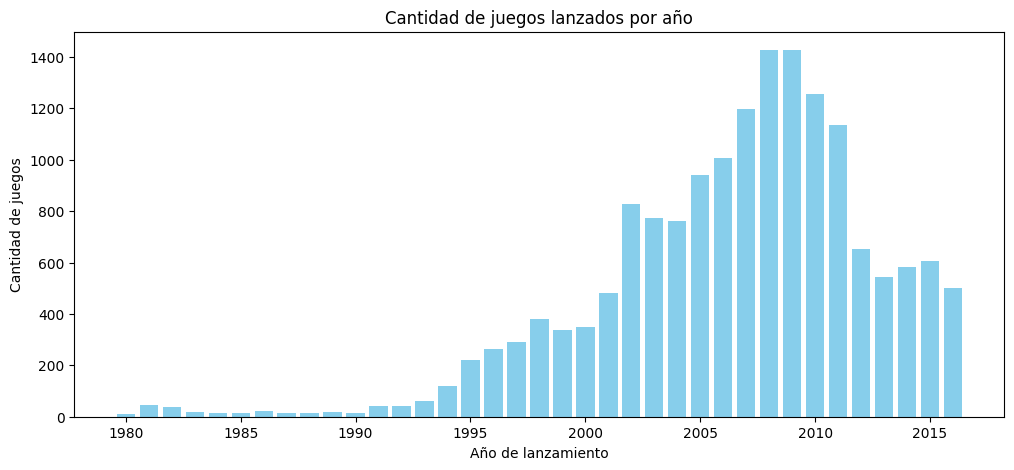

In [60]:
# Visualización de juegos lanzados por año
plt.figure(figsize=(12, 5))
plt.bar(games_per_year.index, games_per_year.values, color='skyblue')
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de juegos")
plt.title("Cantidad de juegos lanzados por año")
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con el cálculo de esta data, pero para presentarla de forma adecuada, realiza un gráfico.
    
PD: veo que lo realizaste más abajo, por favor muevelo aquí    
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien, ahora está más ordenado.

</div>

In [61]:
# Distribución de ventas de las plataformas más populares por año
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(5).index
sales_per_year_platform = df_games[df_games['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
print(sales_per_year_platform)

platform             DS     PS2     PS3     Wii    X360
year_of_release                                        
1985               0.02     NaN     NaN     NaN     NaN
2000                NaN   39.17     NaN     NaN     NaN
2001                NaN  166.43     NaN     NaN     NaN
2002                NaN  205.38     NaN     NaN     NaN
2003                NaN  184.31     NaN     NaN     NaN
2004              17.27  211.81     NaN     NaN     NaN
2005             130.14  160.66     NaN     NaN    8.25
2006             119.81  103.42   20.96  137.15   51.62
2007             146.94   75.99   73.19  152.77   95.41
2008             145.31   53.90  118.52  171.32  135.26
2009             119.54   26.40  130.93  206.97  120.29
2010              85.02    5.64  142.17  127.95  170.03
2011              26.18    0.45  156.78   59.65  143.84
2012              11.01     NaN  107.36   21.71   99.74
2013               1.54     NaN  113.25    8.59   88.58
2014                NaN     NaN   47.76    3.75 

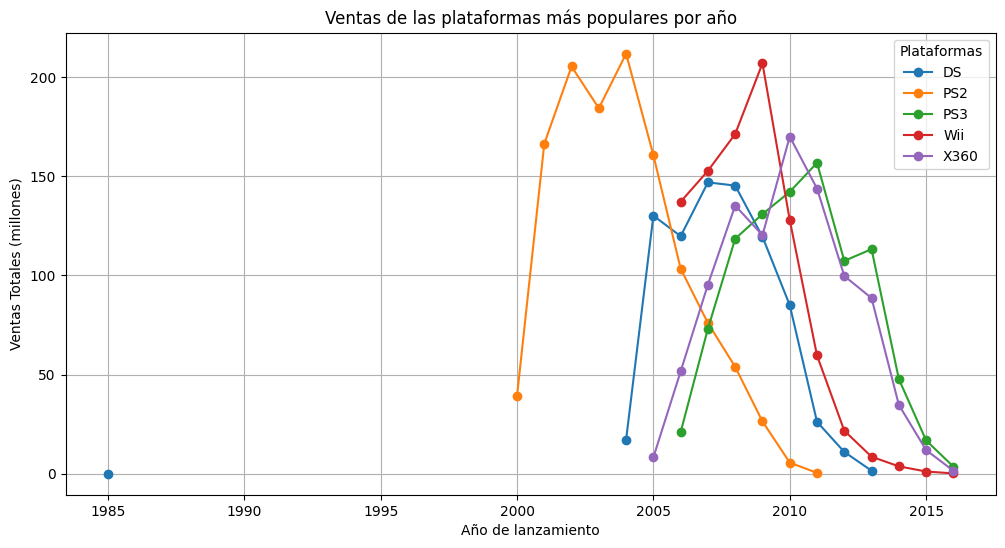

In [62]:
# Visualización de distribución de ventas de las plataformas más populares por año
sales_per_year_platform.plot(kind='line', figsize=(12, 6), marker='o')
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas Totales (millones)")
plt.title("Ventas de las plataformas más populares por año")
plt.legend(title="Plataformas")
plt.grid(True)
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien con el cálculo de la data, pero para presentarla de forma adecuada, realiza un gráfico de líneas, con una serie (línea) para cada plataforma.
    
PD: veo que lo realizaste más abajo, por favor, muevelo aquí    
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien, ahora está más ordenado.

</div>

In [63]:
# Plataformas antiguas que ya no tienen ventas
last_sales_year = df_games.groupby('platform')['year_of_release'].max()
inactive_platforms = last_sales_year[last_sales_year < 2017] 
print(inactive_platforms)

platform
2600    1989
3DO     1995
3DS     2016
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PC      2016
PCFX    1996
PS      2003
PS2     2011
PS3     2016
PS4     2016
PSP     2015
PSV     2016
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
Wii     2016
WiiU    2016
X360    2016
XB      2008
XOne    2016
Name: year_of_release, dtype: Int64


In [64]:
# Tiempo de aparición y desaparición de plataformas
platform_life_span = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life_span['lifespan'] = platform_life_span['max'] - platform_life_span['min']
print(platform_life_span)

           min   max  lifespan
platform                      
2600      1980  1989         9
3DO       1994  1995         1
3DS       2011  2016         5
DC        1998  2008        10
DS        1985  2013        28
GB        1988  2001        13
GBA       2000  2007         7
GC        2001  2007         6
GEN       1990  1994         4
GG        1992  1992         0
N64       1996  2002         6
NES       1983  1994        11
NG        1993  1996         3
PC        1985  2016        31
PCFX      1996  1996         0
PS        1994  2003         9
PS2       2000  2011        11
PS3       2006  2016        10
PS4       2013  2016         3
PSP       2004  2015        11
PSV       2011  2016         5
SAT       1994  1999         5
SCD       1993  1994         1
SNES      1990  1999         9
TG16      1995  1995         0
WS        1999  2001         2
Wii       2006  2016        10
WiiU      2012  2016         4
X360      2005  2016        11
XB        2000  2008         8
XOne    

* Las plataformas con mayores ventas totales incluyen PS2, PS4, X360, Wii y DS.
* Las consolas más recientes tienden a tener un ciclo de vida más corto, mientras que algunas plataformas como la DS han tenido ventas sostenidas durante muchos años.
* Se observa que algunas plataformas tienen ventas dominantes en ciertos períodos, lo que sugiere cambios en la preferencia de los jugadores con cada nueva generación de consolas.
* Consolas como Atari 2600, 3DO, Dreamcast y DS ya no tienen ventas registradas en los últimos años.
* Algunas de estas plataformas tuvieron una vida útil corta (como 3DO con solo 1 año de vida), mientras que otras, como DS, duraron más de 20 años.
* En promedio, las consolas han tenido una duración de entre 5 y 10 años antes de ser reemplazadas.
* Algunas plataformas con una gran longevidad incluyen la DS (28 años) y la Atari 2600 (9 años).
* Las consolas modernas suelen tener ciclos de vida más largos debido a actualizaciones de hardware y servicios digitales.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcta la obenteción de la data y los comentarios.
    
</div>

In [65]:
# Datos relevantes para construir un modelo para 2017
relevant_data = df_games[(df_games['year_of_release'] >= 2013) & (df_games['year_of_release'] <= 2016)]
print(relevant_data)

                                name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42                Grand Theft Auto V      PS4             2014        Action   
...                              ...      ...              ...           ...   
16703               Strawberry Nauts      PSV             2016     Adventure   
16707               Aiyoku no Eustia      PSV             2014          Misc   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

El objetivo de la data a analizar posteriormente es que sea data que sirva para proyectar el 2017. En ese sentido, no se puede utilizar data muy antigua, ya que eso incluiría consolas que ya no existen y tendencias que ya no se repetirán para las consolas aún vigentes. En general, un mínimo de 2 años es suficiente y hasta 4 años puede ser útil. Tomar más años provocaría el problema que menciono.
    
Cambia el periodo de tiempo, reducelo a 3 o 4 años y revisa cómo cambian los análisis de las secciones siguientes. 

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, ahora se toma un periodo de tiempo más adecuado.

</div>

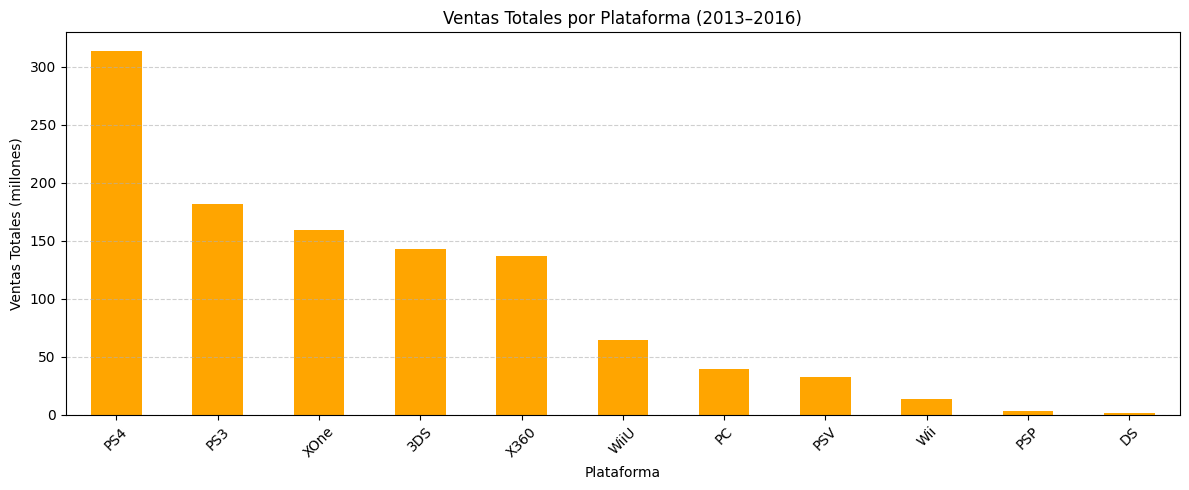

In [71]:
# Gráfico de barras de ventas totales por plataforma 2013-2016
platform_sales = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
platform_sales.plot(kind='bar', color='orange')
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (millones)")
plt.title("Ventas Totales por Plataforma (2013–2016)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, correctos los gráficos.
</div>

<Figure size 1500x700 with 0 Axes>

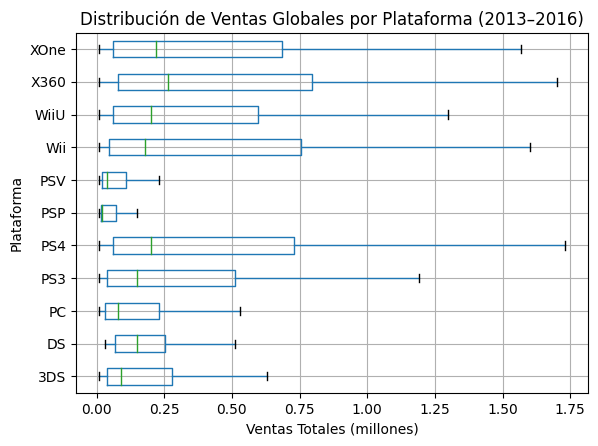

In [76]:
plt.figure(figsize=(15, 7))
relevant_data.boxplot(column='total_sales', by='platform', vert=False, showfliers=False)
plt.xlabel("Ventas Totales (millones)")
plt.ylabel("Plataforma")
plt.title("Distribución de Ventas Globales por Plataforma (2013–2016)")
plt.suptitle("")  
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero este gráfico realizalo con la data relevante para la predicción, la que se obtuvo después de filtrar por año.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien, corregido. Ahora vemos las plataformas que aparecen en la data más reciente.

</div>

* Las plataformas con mayores ventas promedio también muestran valores máximos muy altos, lo cual indica la presencia de títulos extremadamente exitosos.

* En plataformas como PS4 o PS3, las ventas de los juegos están muy repartidas: algunos venden muchísimo, mientras que otros apenas venden. Esto muestra que no todos los juegos tienen el mismo nivel de éxito.

* Plataformas como 3DS o PC muestran distribuciones más estrechas, lo cual indica más homogeneidad pero con menos picos de éxito.

In [75]:
popular_platform = "PS4"
df_popular_platform = df_games[df_games['platform'] == popular_platform]
print(df_popular_platform)

                                 name platform  year_of_release         genre  \
31          Call of Duty: Black Ops 3      PS4             2015       Shooter   
42                 Grand Theft Auto V      PS4             2014        Action   
77                            FIFA 16      PS4             2015        Sports   
87       Star Wars Battlefront (2015)      PS4             2015       Shooter   
92     Call of Duty: Advanced Warfare      PS4             2014       Shooter   
...                               ...      ...              ...           ...   
16500                     Root Letter      PS4             2016     Adventure   
16503               Shin Hayarigami 2      PS4             2016     Adventure   
16526                      Dungeons 2      PS4             2016  Role-Playing   
16530         Carmageddon: Max Damage      PS4             2016        Action   
16585   Farming 2017 - The Simulation      PS4             2016    Simulation   

       na_sales  eu_sales  

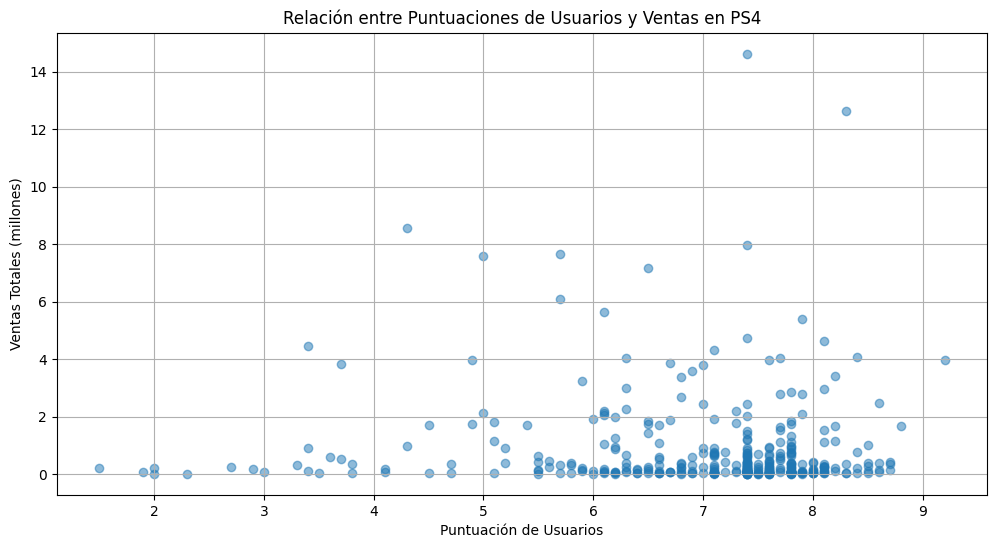

In [72]:
# Gráfico de dispersión entre críticas de usuarios y ventas 
plt.figure(figsize=(12, 6))
plt.scatter(df_popular_platform['user_score'], df_popular_platform['total_sales'], alpha=0.5)
plt.xlabel("Puntuación de Usuarios")
plt.ylabel("Ventas Totales (millones)")
plt.title(f"Relación entre Puntuaciones de Usuarios y Ventas en {popular_platform}")
plt.grid(True)
plt.show()

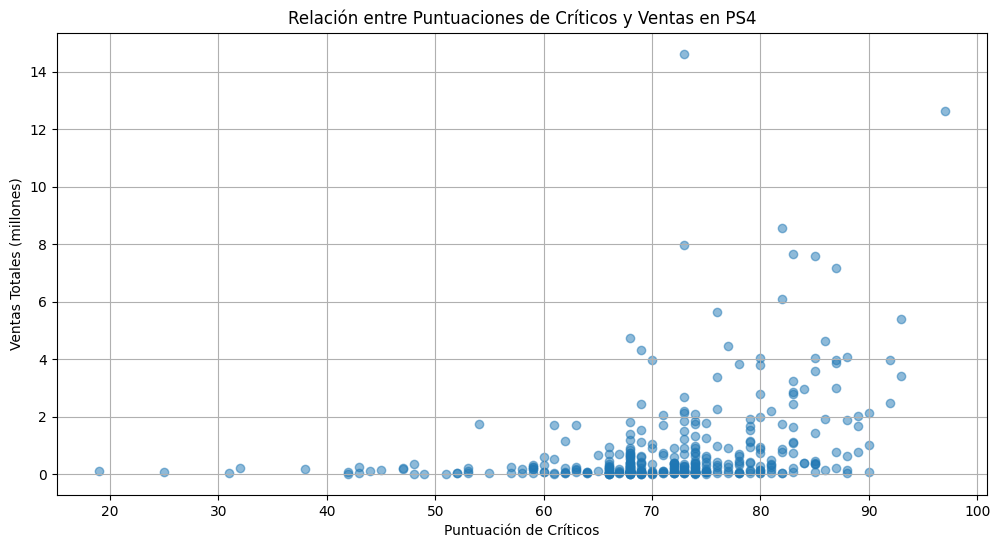

In [73]:
# Gráfico de dispersión entre críticas de profesionales y ventas 
plt.figure(figsize=(12, 6))
plt.scatter(df_popular_platform['critic_score'], df_popular_platform['total_sales'], alpha=0.5)
plt.xlabel("Puntuación de Críticos")
plt.ylabel("Ventas Totales (millones)")
plt.title(f"Relación entre Puntuaciones de Críticos y Ventas en {popular_platform}")
plt.grid(True)
plt.show()

In [74]:
# Cálculo de correlación entre puntuaciones y ventas
user_correlation = df_popular_platform[['user_score', 'total_sales']].corr().iloc[0, 1]
critic_correlation = df_popular_platform[['critic_score', 'total_sales']].corr().iloc[0, 1]
print(critic_correlation)

0.35140802447758573


* La correlación entre la puntuación de usuarios y las ventas es baja o negativa.
* La correlación entre la puntuación de críticos y las ventas es ligeramente más alta, pero aún no es fuerte.
* Aunque las reseñas pueden influir, otros factores como la publicidad, el marketing y la popularidad de la franquicia pueden ser más determinantes.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto el análisis
</div>

In [77]:
multi_platform_games = df_games[df_games.duplicated(subset=['name'], keep=False)]
print(multi_platform_games)

                                                   name platform  \
1                                     Super Mario Bros.      NES   
5                                                Tetris       GB   
16                                   Grand Theft Auto V      PS3   
17                        Grand Theft Auto: San Andreas      PS2   
18                                    Super Mario World     SNES   
...                                                 ...      ...   
16706                     Men in Black II: Alien Escape       GC   
16709  SCORE International Baja 1000: The Official Game      PS2   
16710                     Samurai Warriors: Sanada Maru      PS3   
16713                                  Spirits & Spells      GBA   
16714                               Winning Post 8 2016      PSV   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
1                 1985    Platform     29.08      3.58      6.81         0.77   
5                 198

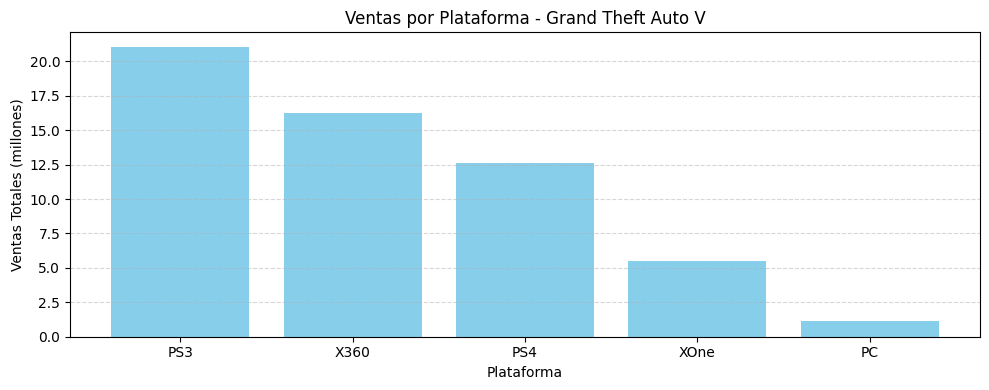

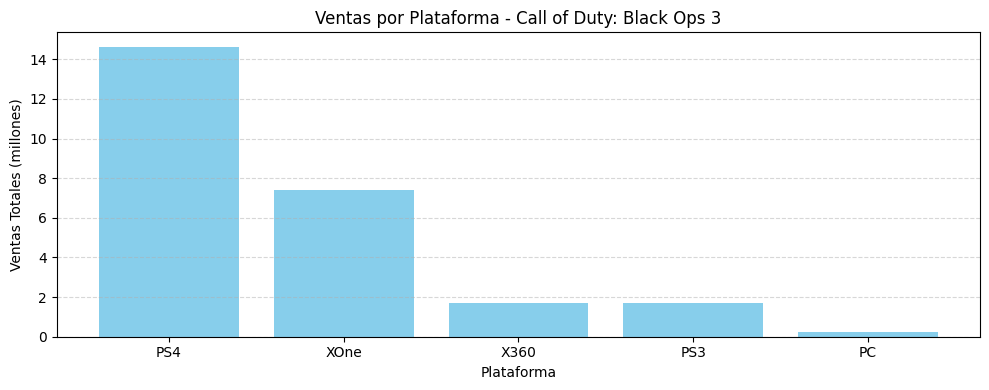

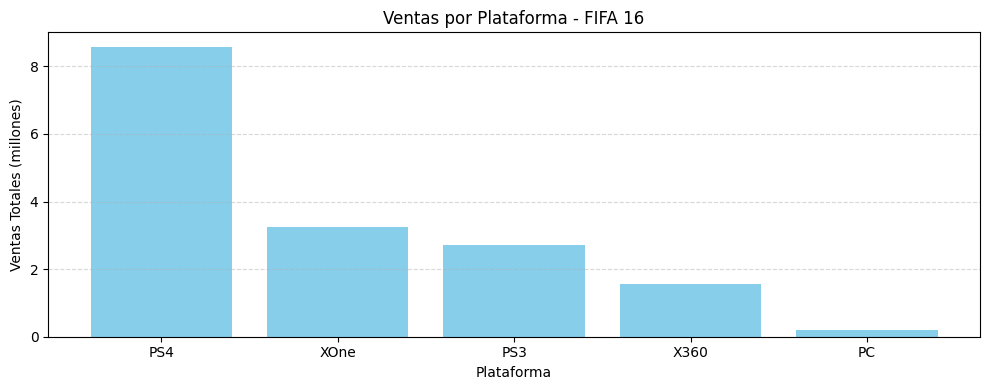

In [78]:
# Gráfico de ventas por plataforma para algunos juegos multiplataforma
multi_platform_games = df_games[df_games.duplicated(subset=['name'], keep=False)]
selected_titles = ['Grand Theft Auto V', 'Call of Duty: Black Ops 3', 'FIFA 16']

for title in selected_titles:
    title_data = multi_platform_games[multi_platform_games['name'] == title]
    plt.figure(figsize=(10, 4))
    plt.bar(title_data['platform'], title_data['total_sales'], color='skyblue')
    plt.title(f"Ventas por Plataforma - {title}")
    plt.xlabel("Plataforma")
    plt.ylabel("Ventas Totales (millones)")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero grafica estos resultados. como son muchos, te recomiendo escoger algunos juegos y graficar las ventas de cada uno para cada plataforma
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Excelente, muy bien!

</div>

* Algunas franquicias han tenido más éxito en plataformas específicas, lo que puede indicar diferencias en la base de usuarios.

In [79]:
# Distribución de juegos por género
genre_sales = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


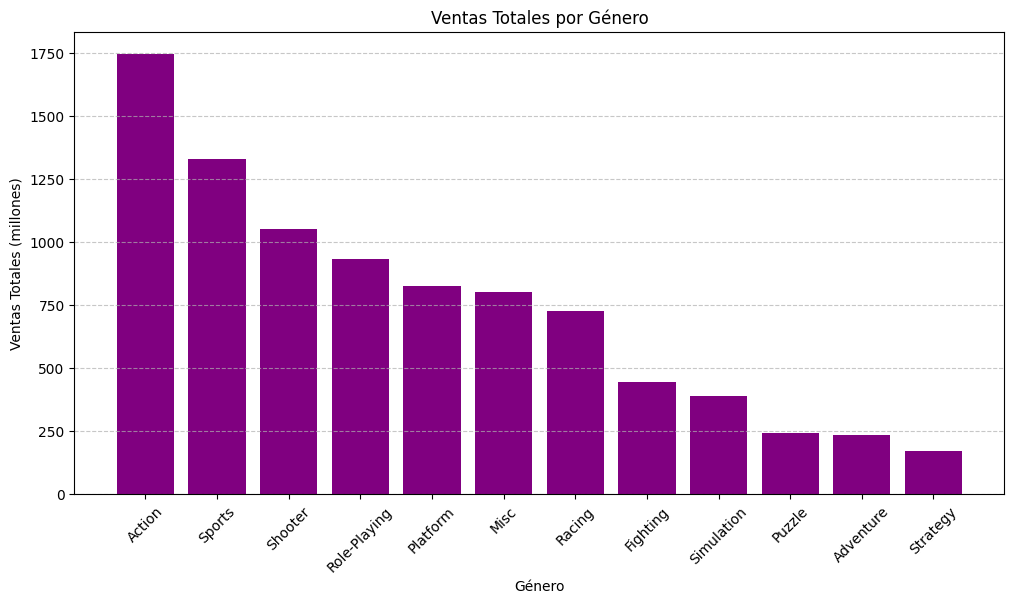

In [80]:
# Visualización de la distribución de géneros 
plt.figure(figsize=(12, 6))
plt.bar(genre_sales.index, genre_sales.values, color='purple')
plt.xlabel("Género")
plt.ylabel("Ventas Totales (millones)")
plt.title("Ventas Totales por Género")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [81]:
# Ventas promedio por género
avg_genre_sales = relevant_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print(avg_genre_sales)

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: total_sales, dtype: float64


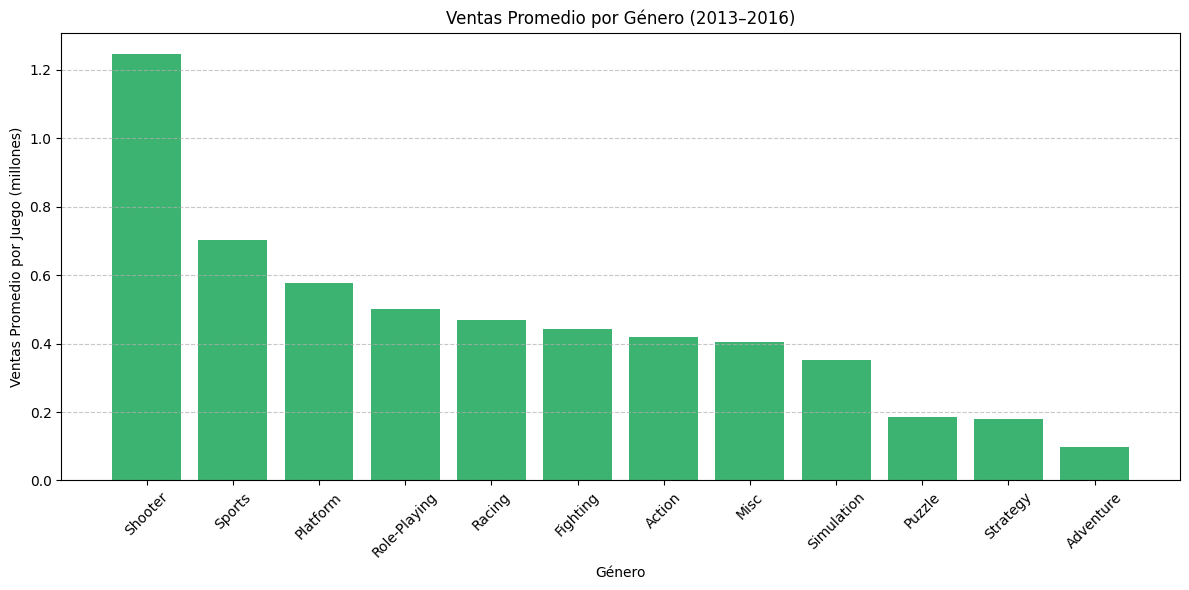

In [82]:
# Visualización de las ventas promedio por género
plt.figure(figsize=(12, 6))
plt.bar(avg_genre_sales.index, avg_genre_sales.values, color='mediumseagreen')
plt.xlabel("Género")
plt.ylabel("Ventas Promedio por Juego (millones)")
plt.title("Ventas Promedio por Género (2013–2016)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Shooter, Sports destacan como géneros muy rentables. Tienen tanto ventas totales altas como ventas promedio elevadas.

* Plataforma y Role-Playing también se mantienen fuertes. Aunque no siempre encabezan en ventas totales, sus promedios son altos, lo que indica que sus juegos venden bien aunque se lancen menos títulos.

* Adventure, Strategy y Puzzle tienen ventas totales bajas y también ventas promedio bajas.

* A pesar de que Action tiene las ventas totales más altas, sus ventas promedio se mantienen en un rango medio-bajo.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor </b> <a class="tocSkip"></a>

Ok con el gráfico, pero la rentabilidad no solo es el total de ventas, sino que también hay que ver la venta promedio por género. Calcula y grafica la venta promedio de cada género.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, esto nos revela que hay géneros que si bien no lideran en total de ventas, tienen un promedio muy alto

</div>

## Perfiles por región

In [91]:
# Determinar las cinco plataformas principales por región
top_platforms_na = relevant_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = relevant_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = relevant_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

In [93]:
combined_platforms = set(top_platforms_na.index).union(set(top_platforms_eu.index)).union(set(top_platforms_jp.index))

comparison_df = pd.DataFrame({
    'NA': relevant_data[relevant_data['platform'].isin(combined_platforms)].groupby('platform')['na_sales'].sum(),
    'EU': relevant_data[relevant_data['platform'].isin(combined_platforms)].groupby('platform')['eu_sales'].sum(),
    'JP': relevant_data[relevant_data['platform'].isin(combined_platforms)].groupby('platform')['jp_sales'].sum()
}).fillna(0).loc[combined_platforms]

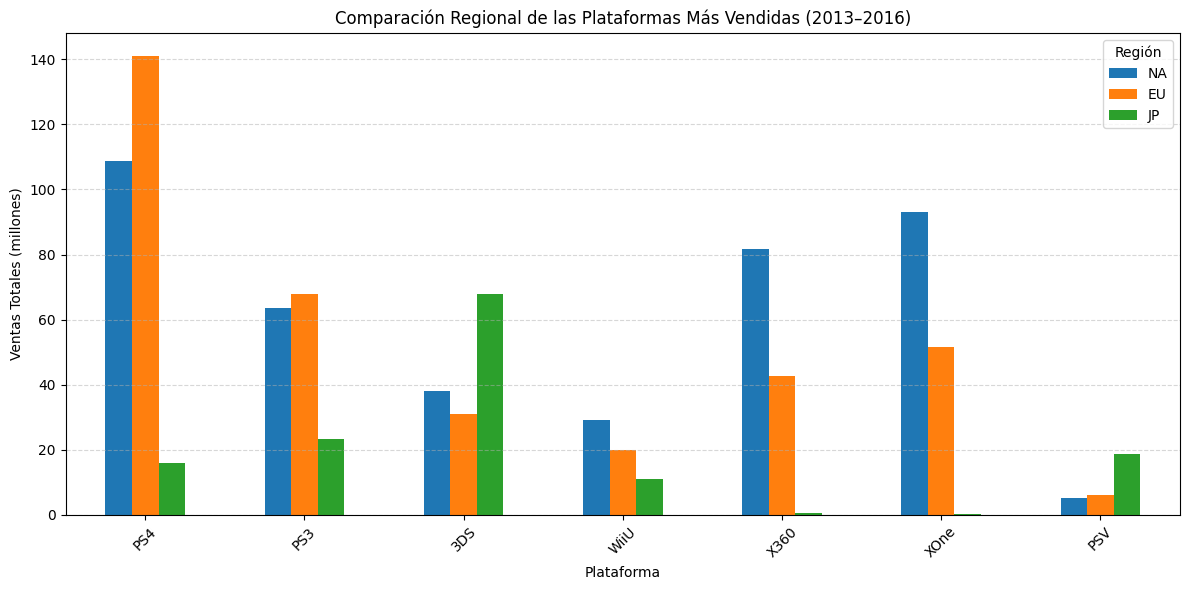

In [99]:
# Visualización de las plataformas principales por región
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title("Comparación Regional de las Plataformas Más Vendidas (2013–2016)")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.legend(title="Región")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor </b> <a class="tocSkip"></a>

El gráfico no está mal, pero las barras podrían estar una al lado de otra para compararlas mejor. 
    
Revisa si hay grandes cambios al usar la data relevante.    

</div>

* PS4 domina en Norteamérica y Europa, con ventas significativamente más altas en ambas regiones. Esto refleja su fuerte presencia en mercados occidentales gracias a una amplia biblioteca de juegos y campañas publicitarias efectivas.

* En Japón, la situación cambia: 3DS y PSV toman la delantera. Las plataformas portátiles tienen mayor cuota, lo cual está en línea con las preferencias culturales por juegos móviles y compactos.

* XOne (Xbox One) tiene una buena presencia en Norteamérica, pero su participación en Europa es mucho menor, y prácticamente inexistente en Japón.

* WiiU, aunque con ventas más bajas, mantiene cierta relevancia en las tres regiones, lo que demuestra un público fiel, especialmente en Japón.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor </b> <a class="tocSkip"></a>

Me parece que el comentario no es de esta parte.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Ok, se corrigió

</div>

In [102]:
# Determinar los cinco géneros principales por región
top_genres_na = relevant_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = relevant_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = relevant_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)


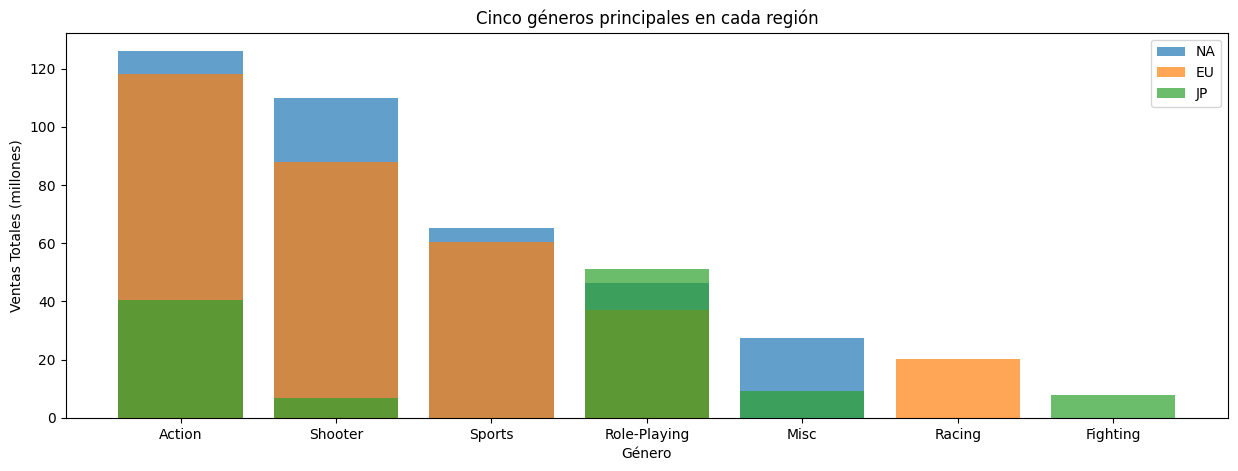

In [104]:
# Visualización de los géneros principales por región
plt.figure(figsize=(15, 5))
plt.bar(top_genres_na.index, top_genres_na.values, label="NA", alpha=0.7)
plt.bar(top_genres_eu.index, top_genres_eu.values, label="EU", alpha=0.7)
plt.bar(top_genres_jp.index, top_genres_jp.values, label="JP", alpha=0.7)
plt.xlabel("Género")
plt.ylabel("Ventas Totales (millones)")
plt.title("Cinco géneros principales en cada región")
plt.legend()
plt.show()

* Action, Shooter y Sports dominan tanto en NA como en EU, lo que sugiere un gusto por títulos dinámicos, competitivos y multijugador.
* En Japón, el panorama cambia: Role-Playing y Plataforma son los géneros más vendidos, influenciados por sagas como Pokémon, Final Fantasy y Mario.
* Shooter tiene menor peso en Japón, lo que confirma que los estilos de juego occidentales no siempre se adaptan al público oriental.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor </b> <a class="tocSkip"></a>

Bien, correcto. Revisa si hay grandes cambios al usar la data relevante.   

</div>

In [105]:
# 3. Analizar el impacto de las clasificaciones ESRB en las ventas por región
esrb_sales_na = relevant_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = relevant_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = relevant_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

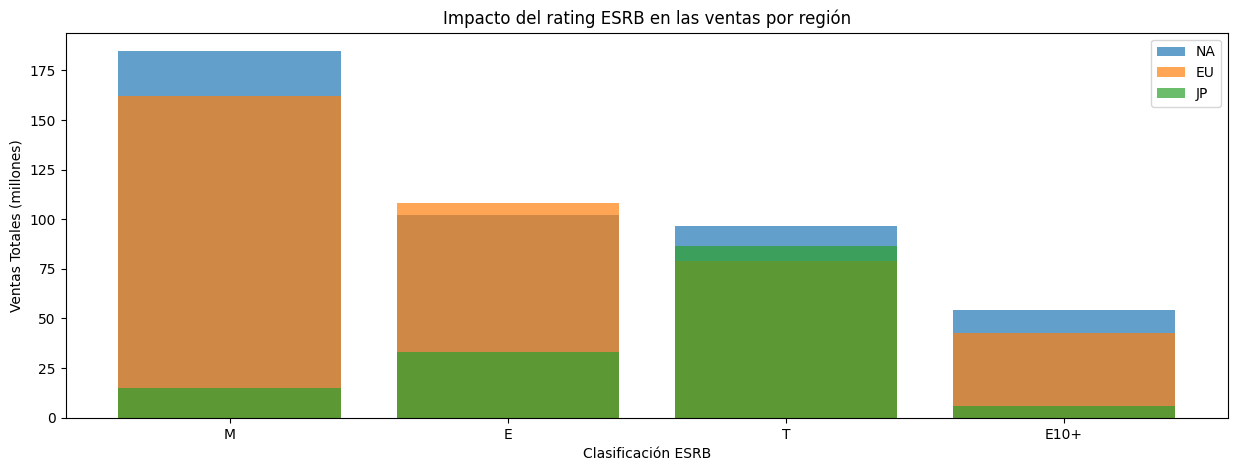

In [106]:
# Visualización de la influencia del rating ESRB en cada región
plt.figure(figsize=(15, 5))
plt.bar(esrb_sales_na.index, esrb_sales_na.values, label="NA", alpha=0.7)
plt.bar(esrb_sales_eu.index, esrb_sales_eu.values, label="EU", alpha=0.7)
plt.bar(esrb_sales_jp.index, esrb_sales_jp.values, label="JP", alpha=0.7)
plt.xlabel("Clasificación ESRB")
plt.ylabel("Ventas Totales (millones)")
plt.title("Impacto del rating ESRB en las ventas por región")
plt.legend()
plt.show()

* En NA y EU, los juegos con clasificación M (Mature) y T (Teen) lideran en ventas, lo que refleja una base de jugadores más adulta y habituada a títulos de acción.
* En Japón, los juegos E (Everyone) y T (Teen) son más populares, indicando una preferencia por juegos accesibles y menos violentos.
* Esta diferencia cultural puede orientar mejor las campañas de marketing y la localización de contenido por región.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor </b> <a class="tocSkip"></a>

Bien hecho, vemos que realmente Japon es un segmento muy diferente a NA y EU.
    
Revisa si hay grandes cambios al usar la data relevante.   

</div>

# 5 Comprobación de hipótesis

In [ ]:
alpha = 0.05

In [109]:
# Comparación de calificaciones promedio de los usuarios entre Xbox One y PC

xbox_one_scores = relevant_data[(relevant_data['platform'] == 'XOne') & (relevant_data['user_score'].notna())]['user_score']
pc_scores = relevant_data[(relevant_data['platform'] == 'PC') & (relevant_data['user_score'].notna())]['user_score']

t_stat_xbox_pc, p_value_xbox_pc = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

if p_value_xbox_pc < alpha:
    conclusion_xbox_pc = "Rechazamos H₀: Las calificaciones promedio en Xbox One y PC son significativamente diferentes."
    print(conclusion_xbox_pc)
else:
    conclusion_xbox_pc = "No rechazamos H₀: No hay suficiente evidencia para decir que las calificaciones promedio en Xbox One y PC sean diferentes."
    print(conclusion_xbox_pc)


No rechazamos H₀: No hay suficiente evidencia para decir que las calificaciones promedio en Xbox One y PC sean diferentes.


In [110]:
# 2. Comparación de calificaciones promedio de los usuarios entre Acción y Deportes

action_scores = relevant_data[(relevant_data['genre'] == 'Action') & (relevant_data['user_score'].notna())]['user_score']
sports_scores = relevant_data[(relevant_data['genre'] == 'Sports') & (relevant_data['user_score'].notna())]['user_score']

t_stat_action_sports, p_value_action_sports = st.ttest_ind(action_scores, sports_scores, equal_var=False)

if p_value_action_sports < alpha:
    conclusion_action_sports = "Rechazamos H₀: Las calificaciones promedio en los géneros de Acción y Deportes son significativamente diferentes."
    print(conclusion_action_sports)
else:
    conclusion_action_sports = "No rechazamos H₀: No hay suficiente evidencia para decir que las calificaciones promedio en los géneros de Acción y Deportes sean diferentes."
    print(conclusion_action_sports)


Rechazamos H₀: Las calificaciones promedio en los géneros de Acción y Deportes son significativamente diferentes.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor </b> <a class="tocSkip"></a>

Correcto, muy bien con los tests. Revisa si hay grandes cambios al usar la data relevante.   
</div>

## Conclusión

* Publicar en plataformas populares como PS4, XOne y 3DS, que lideran las ventas en diferentes regiones.

* PS4 domina en Norteamérica y Europa.

* 3DS y PSV son muy fuertes en Japón, especialmente para géneros como RPG y plataformas.

* Priorizar géneros de alta demanda y rentabilidad comprobada, como:

    * Shooter y Sports, que encabezan tanto en ventas totales como en ventas promedio por juego.

    * Role-Playing y Platform, especialmente en Japón, donde tienen un mercado más fuerte y estable.

* Invertir en marketing y reseñas tempranas, especialmente en géneros competitivos (Shooters, Sports), ya que la visibilidad y percepción inicial influyen en el volumen de ventas.

* Lanzar en períodos estratégicos del año, como el último trimestre (festividades), cuando la demanda se incrementa.

* Adaptar las decisiones a cada región, ya que las preferencias de género y tipo de consola cambian radicalmente:

* Occidente prefiere action y shooters, en consolas domésticas.

* Japón prefiere juegos portátiles y de rol/plataformas, con menos afinidad por shooters o títulos clasificados como M.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Excelente, felicitaciones con estas conclusiones, recogen los puntos más importantes encontrados en el notebok de forma sucinta. Mi único comentario de mejora es que podrías haber incluido valores de las métricas más relevantes, por ejemplo, si se menciona que PS4 domina en NA y EU, entonces mencionar que porcentaje del mercado ocupa.

</div>